In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\yeast_esr_expression_analysis
Added C:\Users\BMH_work\github\yeast_esr_expression_analysis to path: 
['C:\\Users\\BMH_work\\github\\yeast_esr_expression_analysis\\scripts', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\python37.zip', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\DLLs', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression', '', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression

## Data from Federica and Stefan

In [5]:
def get_zr_TPM(zr_fname, zrou_tab_fname, pseudocount): 
    zr_data = pd.read_table(zr_fname, index_col=0, header=None)
    
    #Find gene lengths
    zrou_tab = pd.read_table(zrou_tab_fname, header=None, index_col = 0)
    lengths = dict(zrou_tab.loc[:,3]-zrou_tab.loc[:,2])

    zrou_tab_genes = set(zrou_tab.index)
    genes_norm = {}

    #Find TPM
    #https://reneshbedre.github.io/blog/expression_units.html
    #Wagner et al., 2012

    #use column 3 in star output data
    for gene,counts  in zip(zr_data.index, zr_data.loc[:,3]):
        if gene in zrou_tab_genes: 
            gene_L = lengths[gene]
            #(counts, l, counts/kb)
            genes_norm[gene] = (counts, gene_L, (counts+pseudocount)*(10^3)/gene_L)

    genes_norm_df = pd.DataFrame(genes_norm, )
    genes_norm_df = genes_norm_df.T
    genes_norm_df.columns = ['counts','Length (bp)','counts/kb']

    tpm_norm_factor = sum(genes_norm_df['counts/kb'])

    genes_norm_df['TPM'] = (genes_norm_df['counts/kb']/tpm_norm_factor)*(10^6)
    
    genes_norm_df['log2(TPM)'] = np.log2(genes_norm_df['TPM'])
    
    return genes_norm_df
    #Plot ZR10 vs ZR4

    #Make S. cer Z. rou map

    #Plot orthologs rlog vs this data


In [6]:
zr10_fname = os.path.normpath("C:/Users/BMH_work/Desktop/9_strain_RNA_seq/rnaseq.tar/rnaseq_ZR10_Zr.Zr.GCF_000026365.1_ASM2636v1/ZR10_Zr.Zr.GCF_000026365.1_ASM2636v1_ReadsPerGene.out.tab")
zrou_tab_fname = os.path.normpath("C:/Users/BMH_work/github/y1000plus_tools/genomes/YGOB/Zrou_genome.tab")
pseudocount = 0.1

zr10 = get_zr_TPM(zr10_fname, zrou_tab_fname,pseudocount)
zr10

,counts,Length (bp),counts/kb,TPM,log2(TPM)
ZYRO0A00132g,1746.0,860.0,18.273140,0.001291,-9.597705
ZYRO0A00154g,115.0,698.0,1.484097,0.000105,-13.219772
ZYRO0A00198g,1143.0,863.0,11.921089,0.000842,-10.213914
ZYRO0A00220g,1104.0,1070.0,9.286822,0.000656,-10.574173
ZYRO0A00242g,1256.0,857.0,13.191249,0.000932,-10.067849
...,...,...,...,...,...
ZYRO0G22484g,1416.0,2465.0,5.170345,0.000365,-11.419097
ZYRO0G22506g,2704.0,1019.0,23.883121,0.001687,-9.211438
ZYRO0G22528g,424.0,923.0,4.135320,0.000292,-11.741359
ZYRO0G22550g,914.0,2174.0,3.784223,0.000267,-11.869361


In [7]:
zr4_fname = os.path.normpath("C:/Users/BMH_work/Desktop/9_strain_RNA_seq/rnaseq.tar/rnaseq_ZR4_Zr.Zr.GCF_000026365.1_ASM2636v1/ZR4_Zr.Zr.GCF_000026365.1_ASM2636v1_ReadsPerGene.out.tab")
zrou_tab_fname = os.path.normpath("C:/Users/BMH_work/github/y1000plus_tools/genomes/YGOB/Zrou_genome.tab")
pseudocount = 0.1

zr4 = get_zr_TPM(zr4_fname, zrou_tab_fname,pseudocount)
zr4 

,counts,Length (bp),counts/kb,TPM,log2(TPM)
ZYRO0A00132g,1280.0,860.0,13.396395,0.000677,-10.528714
ZYRO0A00154g,48.0,698.0,0.620201,0.000031,-14.961681
ZYRO0A00198g,1570.0,863.0,16.374160,0.000827,-10.239138
ZYRO0A00220g,1171.0,1070.0,9.850374,0.000498,-10.972309
ZYRO0A00242g,1326.0,857.0,13.926371,0.000704,-10.472740
...,...,...,...,...,...
ZYRO0G22484g,4213.0,2465.0,15.382515,0.000777,-10.329268
ZYRO0G22506g,2153.0,1019.0,19.016585,0.000961,-10.023301
ZYRO0G22528g,327.0,923.0,3.189491,0.000161,-12.599161
ZYRO0G22550g,2473.0,2174.0,10.238224,0.000517,-10.916594


In [14]:
zr10[zr10['counts']<10]

,counts,Length (bp),counts/kb,TPM,log2(TPM)
ZYRO0A08030g,0.0,854.0,0.001054,7.443450e-08,-23.679453
ZYRO0A08646g,3.0,1235.0,0.022591,1.595611e-06,-19.257460
ZYRO0B12518g,8.0,971.0,0.075077,5.302711e-06,-17.524839
ZYRO0C06292g,6.0,389.0,0.141131,9.968100e-06,-16.614250
ZYRO0E02618g,8.0,1304.0,0.055905,3.948568e-06,-17.950239
ZYRO0E10104r,8.0,1802.0,0.040455,2.857343e-06,-18.416894
ZYRO0E10108r,0.0,3422.0,0.000263,1.857600e-08,-25.681985
ZYRO0E10112r,0.0,158.0,0.005696,4.023232e-07,-21.245142
ZYRO0E10114r,0.0,1802.0,0.000499,3.527584e-08,-24.756744
ZYRO0E10296g,1.0,335.0,0.029552,2.087277e-06,-18.869947


Text(0, 0.5, 'ZR4 C: 4% Gly, N: Amm. Sulfate, Log2(TPM)')

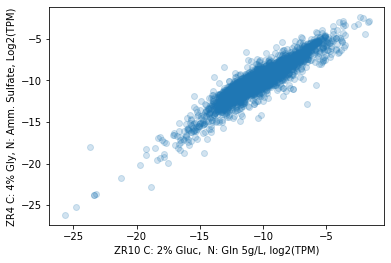

In [9]:
fig, ax = plt.subplots(1,1)

ax.scatter(zr10['log10(TPM)'], zr4['log10(TPM)'], alpha = 0.2)
ax.set_xlabel('ZR10 C: 2% Gluc,  N: Gln 5g/L, log2(TPM)')
ax.set_ylabel('ZR4 C: 4% Gly, N: Amm. Sulfate, Log2(TPM)')

In [12]:
#Get ortholog table between S. cer and Z. rou

scer_zrou = yeast_esr_exp.write_YGOB_orth_lookup_table('Scer', 'Zrou')
zrou_scer = yeast_esr_exp.write_YGOB_orth_lookup_table('Zrou','Scer')

C:\Users\BMH_work\github\yeast_esr_expression_analysis\expression_data\ortholog_files_YGOB\Scer-Zrou-orthologs.txt
C:\Users\BMH_work\github\yeast_esr_expression_analysis\expression_data\ortholog_files_YGOB\Zrou-Scer-orthologs.txt


In [15]:
#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20200603_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(pkainh_deseq.index)


In [16]:
zr_genenames = []
for gene in pkainh_deseq.index:
    try: 
        zr_genename = scer_zrou[gene]
    except KeyError:
        zr_genename = 'NONE'
        
    zr_genenames.append(zr_genename)
pkainh_deseq['zr_genename'] = zr_genenames

In [17]:
zr_merge = pd.merge(zr10, zr4, suffixes=['_ZR4','_ZR10'], how='inner', left_index=True, right_index=True)

In [18]:
zr_merge['log2_ZR4_m_log2_ZR10'] = zr_merge['log2(TPM)_ZR4']-zr_merge['log2(TPM)_ZR10']

In [19]:
sc_zr_merge = pd.merge(pkainh_deseq, zr_merge, how='inner', left_on='zr_genename', right_index=True)

Text(0, 0.5, 'Z.rou: ZR4-ZR10 (Log2(TPM))')

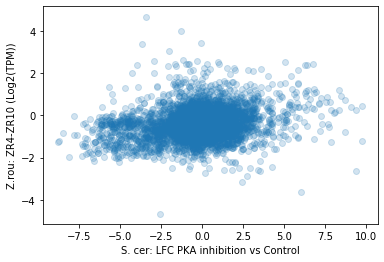

In [20]:
fig, ax = plt.subplots(1,1)
ax.scatter(sc_zr_merge['log2FoldChange'], sc_zr_merge['log2_ZR4_m_log2_ZR10'], alpha=0.2)

ax.set_xlabel('S. cer: LFC PKA inhibition vs Control')
ax.set_ylabel('Z.rou: ZR4-ZR10 (Log2(TPM))')

In [129]:
sc_zr_merge[sc_zr_merge['SC_common_name']=='EGO4']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SC_common_name,zr_genename,counts_ZR4,Length (bp)_ZR4,counts/kb_ZR4,TPM_ZR4,log2(TPM)_ZR4,counts_ZR10,Length (bp)_ZR10,counts/kb_ZR10,TPM_ZR10,log2(TPM)_ZR10,log2_ZR4_m_log2_ZR10
YNR034W-A,306.340127,7.200947,0.44753,16.09041,2.978598e-58,2.665379e-56,EGO4,ZYRO0D08008g,978.0,260.0,33.857308,0.002391,-8.707963,2252.0,260.0,77.957308,0.003939,-7.987875,-0.720088


In [29]:
set(zrou_tab.index) - set(zr10.index)

{'Zrou_1.trna10T',
 'Zrou_1.trna11A',
 'Zrou_1.trna12R',
 'Zrou_1.trna13E',
 'Zrou_1.trna14M',
 'Zrou_1.trna15S',
 'Zrou_1.trna16V',
 'Zrou_1.trna17M',
 'Zrou_1.trna18I',
 'Zrou_1.trna19A',
 'Zrou_1.trna1D',
 'Zrou_1.trna20F',
 'Zrou_1.trna21L',
 'Zrou_1.trna22T',
 'Zrou_1.trna23M',
 'Zrou_1.trna24S',
 'Zrou_1.trna25L',
 'Zrou_1.trna26E',
 'Zrou_1.trna27D',
 'Zrou_1.trna28E',
 'Zrou_1.trna29R',
 'Zrou_1.trna2I',
 'Zrou_1.trna30D',
 'Zrou_1.trna31S',
 'Zrou_1.trna32S',
 'Zrou_1.trna33A',
 'Zrou_1.trna3E',
 'Zrou_1.trna4I',
 'Zrou_1.trna5I',
 'Zrou_1.trna6Y',
 'Zrou_1.trna7L',
 'Zrou_1.trna8V',
 'Zrou_1.trna9S',
 'Zrou_2.trna10I',
 'Zrou_2.trna11R',
 'Zrou_2.trna12L',
 'Zrou_2.trna13N',
 'Zrou_2.trna14S',
 'Zrou_2.trna15G',
 'Zrou_2.trna16T',
 'Zrou_2.trna17R',
 'Zrou_2.trna18N',
 'Zrou_2.trna19G',
 'Zrou_2.trna1S',
 'Zrou_2.trna20K',
 'Zrou_2.trna21L',
 'Zrou_2.trna22L',
 'Zrou_2.trna23G',
 'Zrou_2.trna24G',
 'Zrou_2.trna25P',
 'Zrou_2.trna26V',
 'Zrou_2.trna27E',
 'Zrou_2.trna28R',
 'Z

In [ ]:
#Plot orthologs rlog vs this data, 